In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from src.data.make_dataset import *
from src.data.modal_data import *

In [5]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_folder = os.path.join(package_folder, 'data')
print(data_folder)

location = 'nw2'
turbine = 'c02'

c:\Users\Max\Documents\OWI_LAB\Code\DCE_EOVnorm\dce_eov_normalisation\data


In [6]:
turbine_data = get_turbine_data(data_folder, location, turbine)
mpe_ss_data = get_mpe_data(turbine_data, 'SS', location, turbine)

c:\Users\Max\Documents\OWI_LAB\Code\DCE_EOVnorm\dce_eov_normalisation\data\raw\nw2\nw2c02.parquet


In [7]:
from src.data.harmonics import *
harmonics_data = harmonics(turbine_data.filter(regex='rpm'), [1,3,6, 9])

In [11]:
turbine_data.filter(regex='rpm')

,mean_NW2_C02_rpm
timestamp,
2022-10-01 00:00:00+00:00,NaN
2022-10-01 00:10:00+00:00,10.445
2022-10-01 00:20:00+00:00,10.445
2022-10-01 00:30:00+00:00,10.445
2022-10-01 00:40:00+00:00,10.445
...,...
2023-07-31 23:20:00+00:00,10.445
2023-07-31 23:30:00+00:00,10.445
2023-07-31 23:40:00+00:00,10.445


In [12]:
campbell_data = mpe_ss_data.copy()
campbell_data['rpm'] = turbine_data.filter(regex='rpm')

In [17]:
harmonics_data['rpm'] = turbine_data.filter(regex='rpm')
harmonics_data

,harmonic_1p,harmonic_3p,harmonic_6p,harmonic_9p,rpm
timestamp,,,,,
2022-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2022-10-01 00:10:00+00:00,0.174083,0.52225,1.0445,1.56675,10.445
2022-10-01 00:20:00+00:00,0.174083,0.52225,1.0445,1.56675,10.445
2022-10-01 00:30:00+00:00,0.174083,0.52225,1.0445,1.56675,10.445
2022-10-01 00:40:00+00:00,0.174083,0.52225,1.0445,1.56675,10.445
...,...,...,...,...,...
2023-07-31 23:20:00+00:00,0.174083,0.52225,1.0445,1.56675,10.445
2023-07-31 23:30:00+00:00,0.174083,0.52225,1.0445,1.56675,10.445
2023-07-31 23:40:00+00:00,0.174083,0.52225,1.0445,1.56675,10.445


(0.0, 1.5)

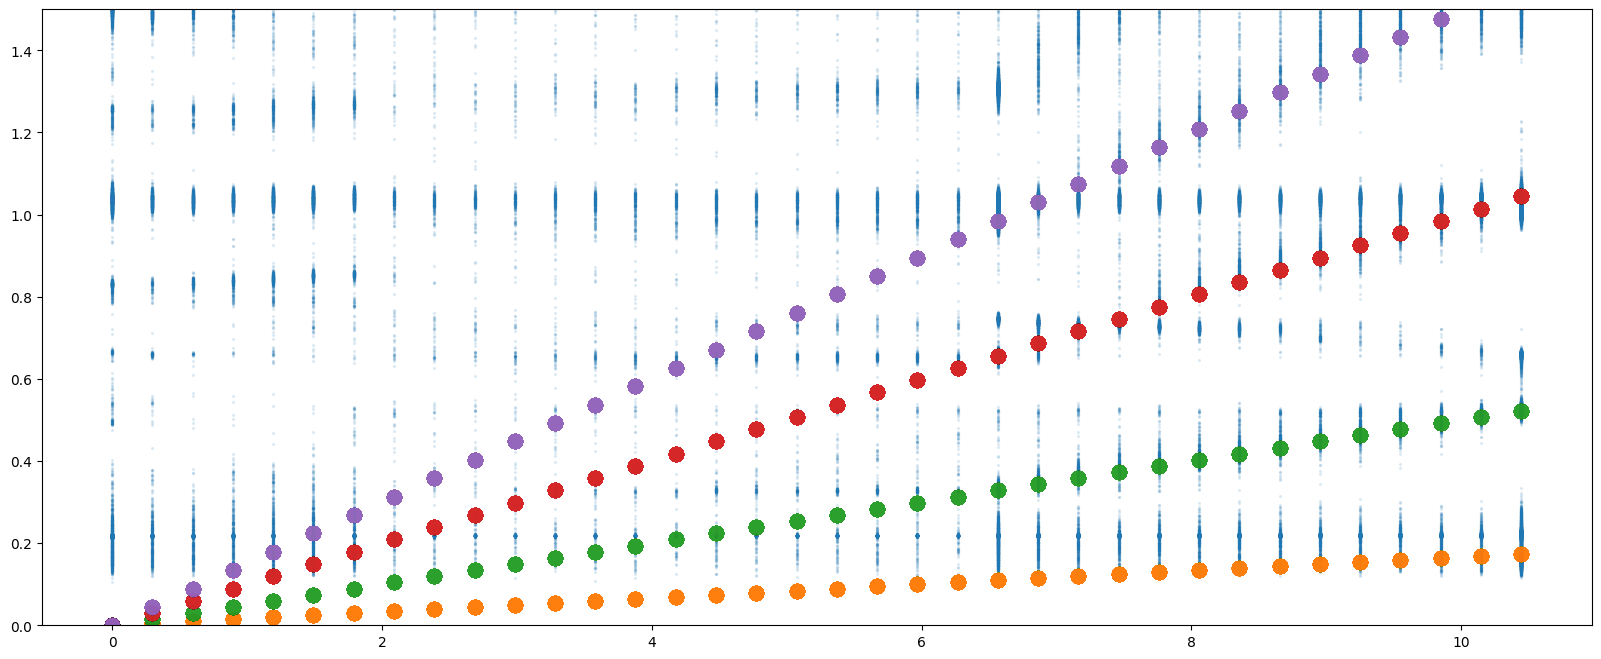

In [22]:
plt.figure(figsize=(20,8))
plt.scatter(campbell_data['rpm'], campbell_data['mean_frequency'], s=2, alpha=0.1)
for harmonic in harmonics_data.columns[:-1]:
    plt.scatter(harmonics_data['rpm'], harmonics_data[harmonic], s=100, alpha=0.1)
plt.ylim(0,1.5)

In [36]:
from pytz import utc
mpe_ss_whirling_data_plot = campbell_data.copy().reset_index()
mpe_ss_whirling_data_plot = mpe_ss_whirling_data_plot[mpe_ss_whirling_data_plot['mean_frequency'] < 0.9]
mpe_ss_whirling_data_plot = mpe_ss_whirling_data_plot[mpe_ss_whirling_data_plot['mean_frequency'] > 0.4]

In [38]:
import dash
from data_selector.dash_lasso_data_selector import *

# Create a Dash app instance
app = dash.Dash(__name__)

# Load your dataset
df = mpe_ss_whirling_data_plot.drop(columns=['algorithm'])

# Create the app
dash_app = DashLassoDataSelector(df, app,fig_size=(1600, 600), marker_size=5)
dash_app.run()

In [50]:
dash_app.all_confirmed_data
selected_data = pd.concat([dash_app.all_confirmed_data[i] for i in list(dash_app.all_confirmed_data.keys())]).set_index('timestamp')
selected_data.to_parquet(os.path.join(data_folder, 'processed','nw2', 'whirling', turbine+'_whirling_selected_data.parquet'))

In [51]:
dash_app.all_confirmed_data[2]

,timestamp,mean_damping,mean_frequency,size,std_damping,std_frequency,rpm
2167,2022-10-02 08:40:00+00:00,0.643289,0.747758,19,0.220815,0.001699,6.565
2175,2022-10-02 08:50:00+00:00,1.344510,0.725712,33,0.320363,0.003016,6.864
2220,2022-10-02 09:30:00+00:00,0.969385,0.736345,21,0.328184,0.002134,6.864
2259,2022-10-02 10:10:00+00:00,1.603956,0.733371,33,0.234343,0.002641,6.864
2337,2022-10-02 11:20:00+00:00,0.843861,0.724516,35,0.179303,0.001851,6.864
...,...,...,...,...,...,...,...
512610,2023-07-28 10:20:00+00:00,4.604591,0.721731,16,0.315723,0.001750,6.864
512915,2023-07-28 14:00:00+00:00,0.442689,0.735537,24,0.325074,0.003195,6.864
513002,2023-07-28 15:10:00+00:00,1.964467,0.721681,35,0.412194,0.004308,6.864
514376,2023-07-29 08:40:00+00:00,0.403853,0.741099,20,0.203842,0.000883,6.565


C:\Users\Max\AppData\Local\Temp\ipykernel_14628\1314555199.py:11: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



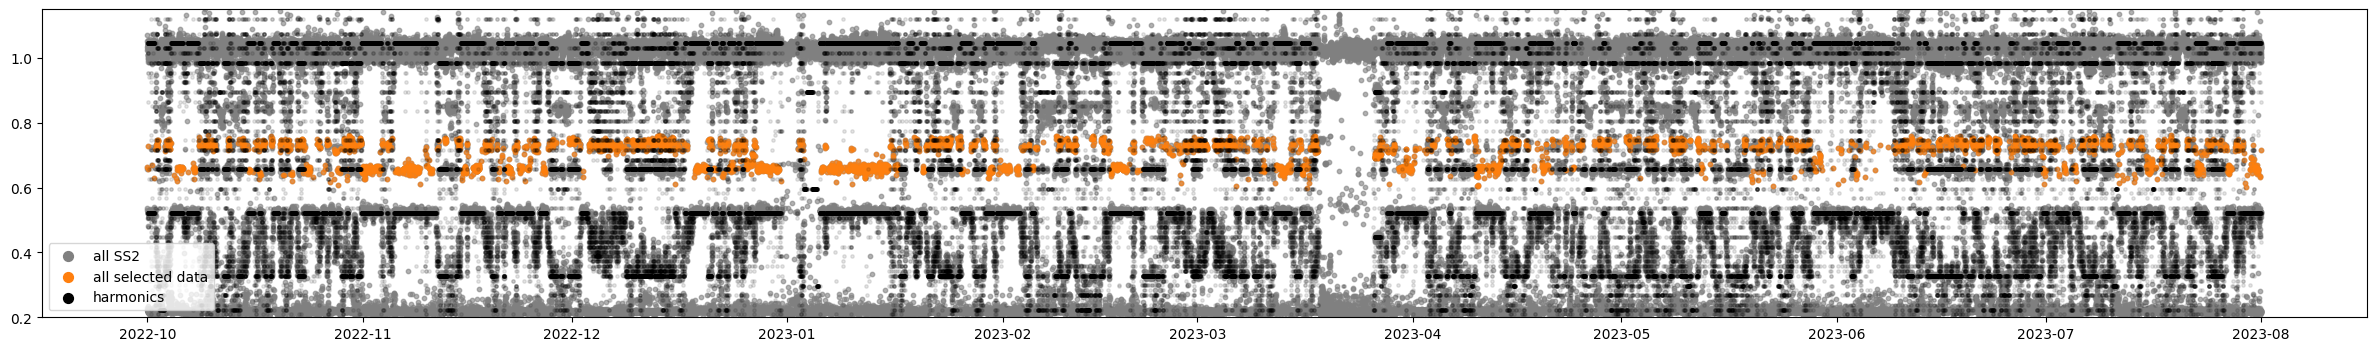

In [52]:
plt.figure(figsize=(30,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
#plt.scatter(mpe_ss_data_lowrpm.index, mpe_ss_data_lowrpm['mean_frequency'], s=10, alpha=0.6, color='tab:green')
plt.scatter(selected_data.index, selected_data['mean_frequency'], s=10, alpha=0.6, color='tab:orange')

for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.ylim(0.2, 1.15)
legend = plt.legend(loc='lower left', labels=['all SS2', 'all selected data', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_14628\3714720357.py:11: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



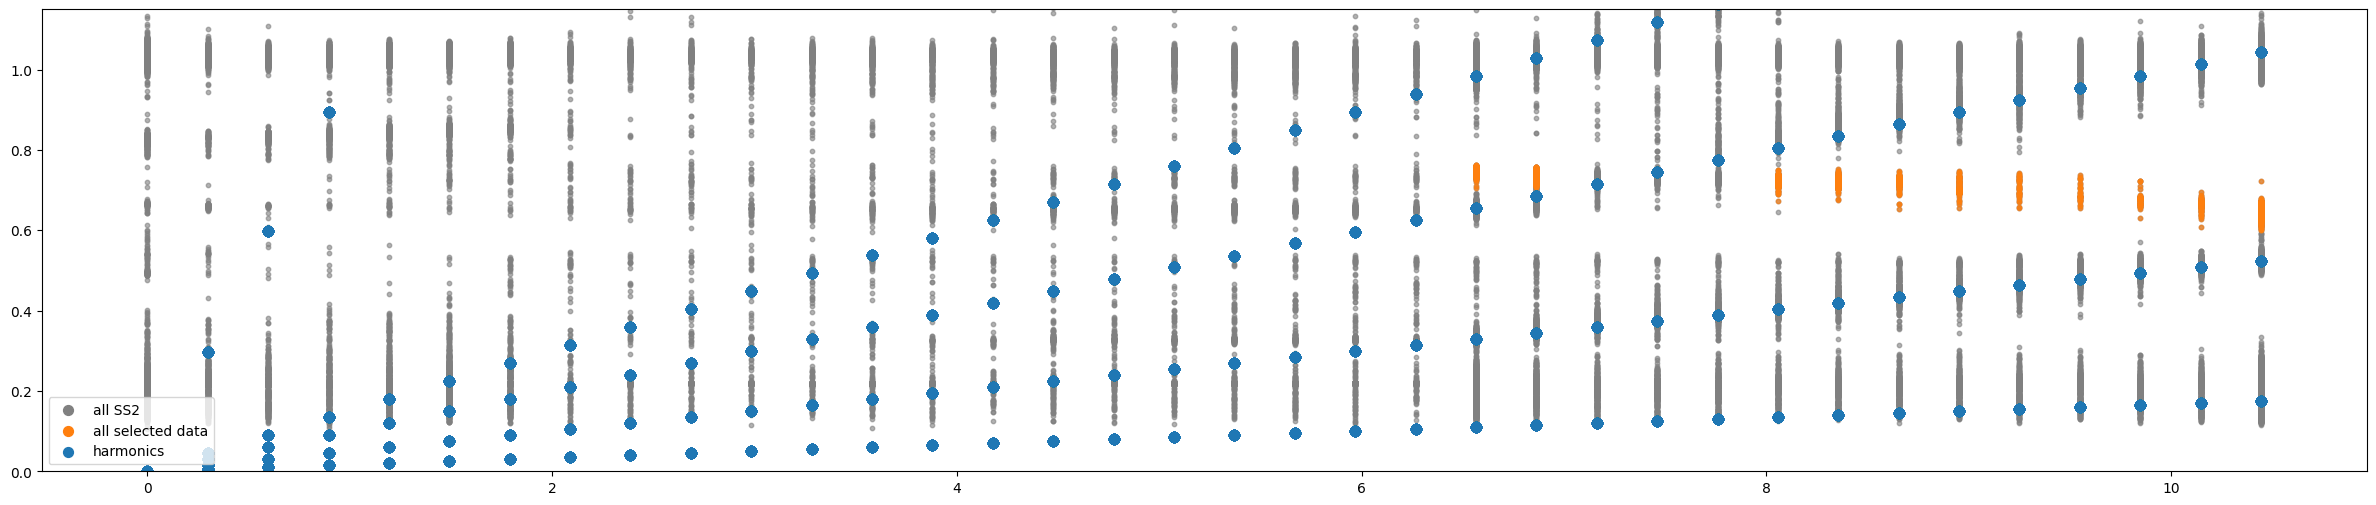

In [56]:
plt.figure(figsize=(30,6))

plt.scatter(campbell_data['rpm'], mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
#plt.scatter(mpe_ss_data_lowrpm.index, mpe_ss_data_lowrpm['mean_frequency'], s=10, alpha=0.6, color='tab:green')
plt.scatter(selected_data['rpm'], selected_data['mean_frequency'], s=10, alpha=0.6, color='tab:orange')

for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data['rpm'], harmonics_data[harmonic], s=50, alpha=1.0, color='tab:blue')
plt.ylim(0, 1.15)
legend = plt.legend(loc='lower left', labels=['all SS2', 'all selected data', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()